# SIMULACIÓN | LABORATORIO 5


## Boostrap o remuestreo

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la mediana de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [2]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
len(datos)


28

In [3]:
n = len(datos)
m = statistics.median(datos)
print (m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.median(dat))
    
var = statistics.variance(mn)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (m, rango )))

              

11.649999999999999
0.248214898989899


<IPython.core.display.Math object>

### Respuesta

### 1.1)

In [4]:
tol = 1e-3
n = len(datos)
b = 90
idx = 0
dif = 1
conv = False
var_b = []
while(not conv):
    b+=10
    mn =[]
    for i in range(b):
        dat = np.random.choice(list(datos),size=n,replace=True)
        mn.append(statistics.median(dat))
        
    var = statistics.variance(mn)
    var_b.append(var)
    if(idx > 1):
        if((abs(var_b[idx] - var_b[idx-1]) < tol) and (abs(var_b[idx-1] - var_b[idx-2]) < tol)):
            conv = True
    idx+=1    
print("Se ha alcanzado la convergencia con b = ",b)   

Se ha alcanzado la convergencia con b =  4020


Luego de experimentar con el valor de p, se obtuvo que aproximadamente con un valor de 2810 se logra una convergencia en cuanto a la varianza de la mediana.

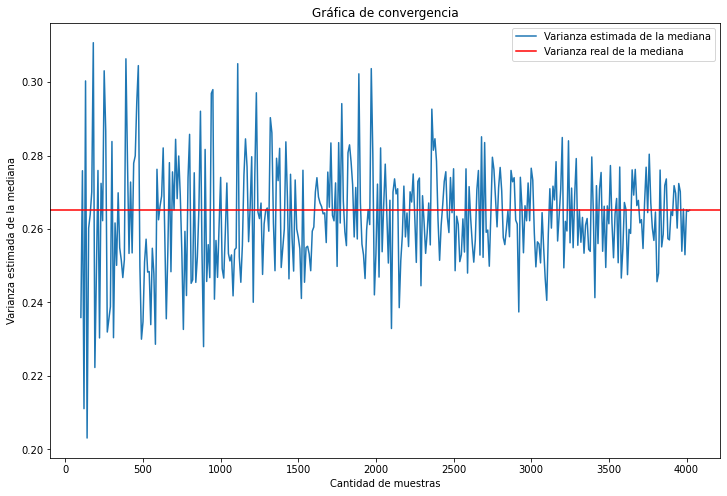

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(100,b+10,10)
ax.plot(x,var_b, label="Varianza estimada de la mediana")
ax.axhline(y=var, color='r', linestyle='-', label='Varianza real de la mediana')
ax.set_xlabel("Cantidad de muestras")
ax.set_ylabel("Varianza estimada de la mediana")
ax.set_title("Gráfica de convergencia")
ax.legend()

Se observa que aproximadamente con p = 2810, es decir, 2810 muestras de bootstrap se logra una convergencia de la varianza estimada de la mediana considerando una tolerancia igual a 1e-4.

### 1.2)

Estimación error medio cuadrático.

In [9]:

err = []
for i in range(b):
    err.append((mn[i] - m)**2) 
mse = sum(err)/b
mse

0.2510500000000003

### 1.3)

Para el análisis se eligió la curtusis como estadístico.

In [10]:
b = 100
kurt = stats.kurtosis(datos)
n = len(datos)
print (kurt)
b=100

kurt_list =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    kurt_list.append(stats.kurtosis(dat))
    
var = statistics.variance(kurt_list)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (kurt, rango )))

0.6367811949310642
0.796882542878727


<IPython.core.display.Math object>

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia en cada caso.
3. Compare y comente sus resultados.



### Respuesta

### 2.1)

In [5]:
mu, sigma = stats.norm.fit(datos)
display(mu, sigma)

12.225000000000003

3.3405116160766237

In [9]:
# Estimación de la media mu
tol = 1e-3
b = 90
idx = 0
dif = 1
var_b = []
conv = False
while(not conv):
    b+=10
    mean_list =[]
    for i in range(b):
        dat = np.random.choice(list(datos),size=n,replace=True)
        mean_list.append(statistics.mean(dat))
        
    var = statistics.variance(mean_list)
    var_b.append(var)
    if(idx > 1):
        if((abs(var_b[idx] - var_b[idx-1]) < tol) and (abs(var_b[idx-1] - var_b[idx-2]) < tol)):
            conv = True
    idx+=1    
print("Se ha alcanzado la convergencia con b = ",b) 

Se ha alcanzado la convergencia con b =  4350


Text(0.5, 1.0, 'Gráfica de convergencia')

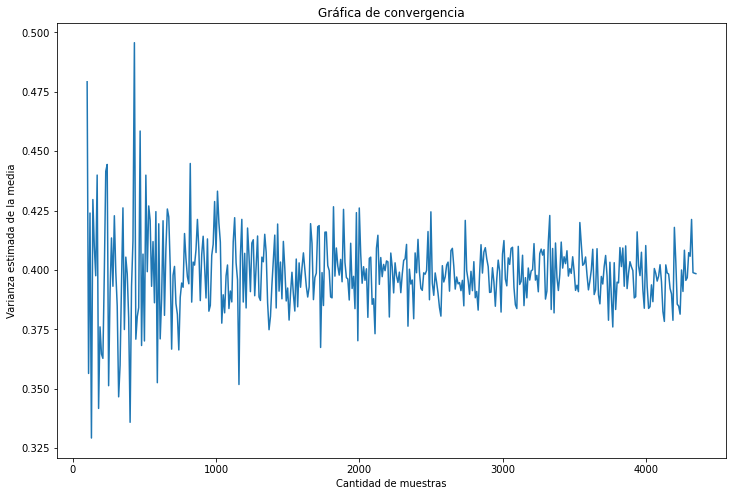

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(100,b+10,10)
ax.plot(x,var_b)
ax.set_xlabel("Cantidad de muestras")
ax.set_ylabel("Varianza estimada de la media")
ax.set_title("Gráfica de convergencia")

In [11]:
statistics.mean(mean_list)

12.22543842364532

In [7]:
# Estimación de la media mu

print(statistics.pstdev(datos))
tol = 1e-3
b = 90
idx = 0
dif = 1
var_b = []
conv = False
while(not conv):
    b+=10
    desvest_list =[]
    for i in range(b):
        dat = np.random.choice(list(datos),size=n,replace=True)
        desvest_list.append(statistics.pstdev(dat))
       
        
    var = statistics.variance(desvest_list)
    var_b.append(var)
    if(idx > 1):
        if((abs(var_b[idx] - var_b[idx-1]) < tol) and (abs(var_b[idx-1] - var_b[idx-2]) < tol)):
            conv = True
    idx+=1    
print("Se ha alcanzado la convergencia con b = ",b) 

3.340511616076624
Se ha alcanzado la convergencia con b =  1580


Text(0.5, 1.0, 'Gráfica de convergencia')

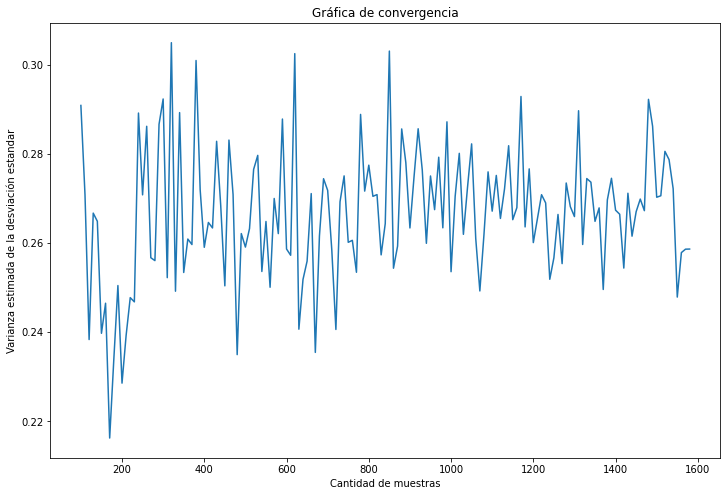

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(100,b+10,10)
ax.plot(x,var_b)
ax.set_xlabel("Cantidad de muestras")
ax.set_ylabel("Varianza estimada de la desviación estandar")
ax.set_title("Gráfica de convergencia")

In [8]:
statistics.mean(desvest_list)

3.227657152056036